In [1]:
import torch
torch.cuda.is_available()

False

In [2]:
# !python road_pre.py

In [68]:
import pandas as pd
import os
x_train_path = r'data/HQZX/train/412333612.csv'
s_data = pd.read_csv(x_train_path)
    

In [69]:
s_data.head()

,Unnamed: 0,信息类型,信息来源,目标时间,目标编号,纬度,经度,船舶类型,纬度2,经度2,目标时间2,间隔时间,间隔距离,临时速度,State,SegmentID
0,0,7,3,1538321588,412333612,39.759457,124.145522,3,39.759457,124.145520,1.538322e+09,50.0,0.142821,0.002856,2,-1
1,1,7,3,1538321638,412333612,39.759457,124.145520,3,39.759458,124.145520,1.538322e+09,10.0,0.185050,0.018503,2,-1
2,2,7,3,1538321648,412333612,39.759458,124.145520,3,39.759458,124.145520,1.538322e+09,10.0,0.000000,0.000000,2,-1
3,3,7,3,1538321658,412333612,39.759458,124.145520,3,39.759503,124.145470,1.538322e+09,11.0,6.581916,0.598302,1,-1
4,4,7,3,1538321669,412333612,39.759503,124.145470,3,39.759458,124.145518,1.538322e+09,20.0,6.489849,0.324476,1,-1


In [80]:
def csv_add(new_csv,candidate_points):
    if new_csv is None:
        new_csv = candidate_points[0]
        for point in candidate_points[1:]:
            new_csv = pd.concat([new_csv,point])
    else:
        for point in candidate_points:
            new_csv = pd.concat([new_csv,point])
    return new_csv

In [81]:
# 2 minute, 每6个点,或者10个点预测下一个点
import os
sentence_length = 6
interval_time = 120
error_seconds = 5
def wash_data(csv):
    flag = 0
    no_ = 0 
    candidate_points = []
    seconds = 0.0
    new_csv = None
    name = str(s_data.loc[:,'目标编号'][0])
    for i in range(len(s_data)):
        point = s_data.loc[[i]]
        no_ += 1
        candidate_points.append(point)
        seconds += float(point['间隔时间'])
        if no_ == sentence_length:
            if seconds >= interval_time - error_seconds \
                        and seconds <= interval_time + error_seconds:
                new_csv = csv_add(new_csv,candidate_points)
                no_ = no_ - 1
                seconds = seconds - float(candidate_points[0]['间隔时间'])
                candidate_points.remove(candidate_points[0])
            else:
                if new_csv is not None:
                    path = os.path.join('./washed_data',name+'_'+str(i)+'.csv')
                    new_csv.to_csv(path)
                new_csv = None
                no_ = 0 
                candidate_points = []
                seconds = 0.0
                continue
#     return new_csv

In [ ]:
wash_data(s_data)

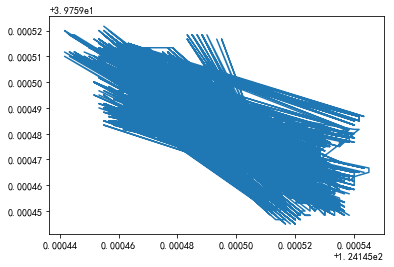

In [72]:
import matplotlib.pyplot as plt
%matplotlib inline
x_ = s_data['经度']
y_ = s_data['纬度']
plt.plot(x_,y_)
plt.show()